# Notes on Chapter 6 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_moons
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

## Iris dataset example

Load the iris dataset, limiting the features to petal length and width

In [2]:
iris = load_iris()
feature_names = iris.feature_names[2:]
target_names = iris.target_names
iris_X = iris.data[:,2:]
iris_y = iris.target
feature_names

['petal length (cm)', 'petal width (cm)']

Fit a decision tree classifier to the dataset

In [3]:
m = DecisionTreeClassifier(max_depth=3, random_state=42)
m.fit(iris_X, iris_y);

Show a diagram of the learned decision tree

In [4]:
from sklearn.tree import export_graphviz
import tempfile
from IPython.display import Image,display
import graphviz

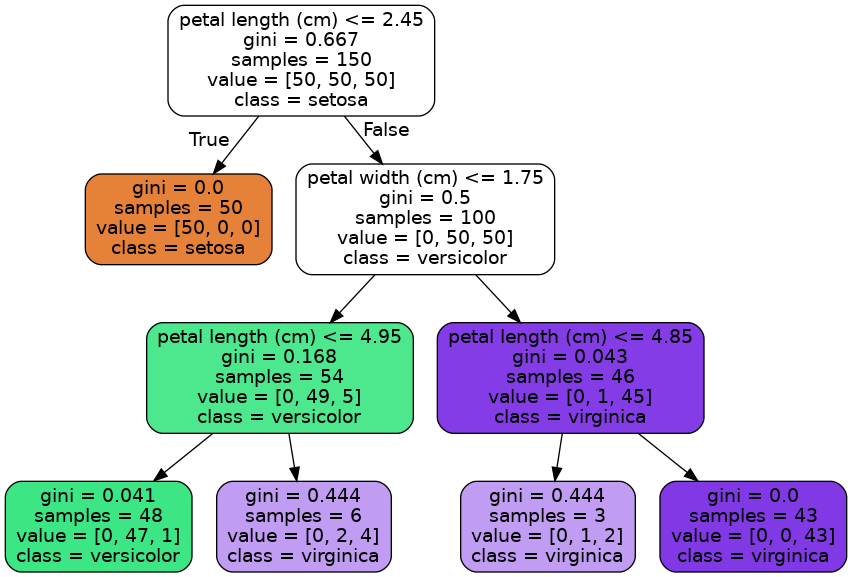

In [5]:
with tempfile.NamedTemporaryFile('w+t', suffix=".dot") as dotfile, \
        tempfile.NamedTemporaryFile('w+b', suffix=".png") as pngfile:
    export_graphviz(m, out_file=dotfile.name, feature_names=feature_names,
                    class_names=target_names, rounded=True, filled=True)
    graphviz.render(engine='dot', filepath=dotfile.name, outfile=pngfile.name)
    display(Image(pngfile.name))

Show the decision boundaries for the decision tree with the iris training dataset

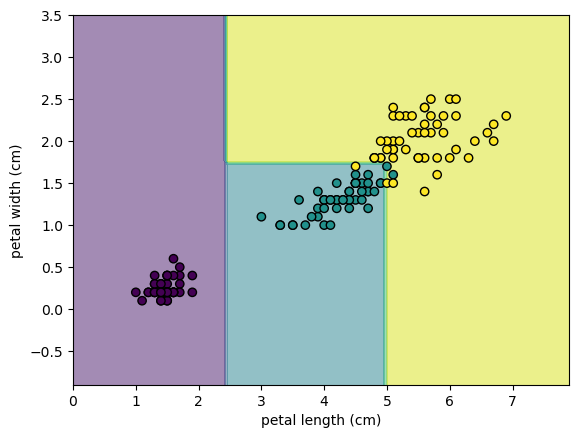

In [6]:
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")

## Moons dataset example

Generate data from the moons dataset

In [7]:
moons_X,moons_y = make_moons(noise=0.25, random_state=42)

Fit a decision tree to the moons dataset

In [8]:
m = DecisionTreeClassifier(random_state=42)
m.fit(moons_X, moons_y);

Show the decision boundaries for the decision tree with the moons training dataset

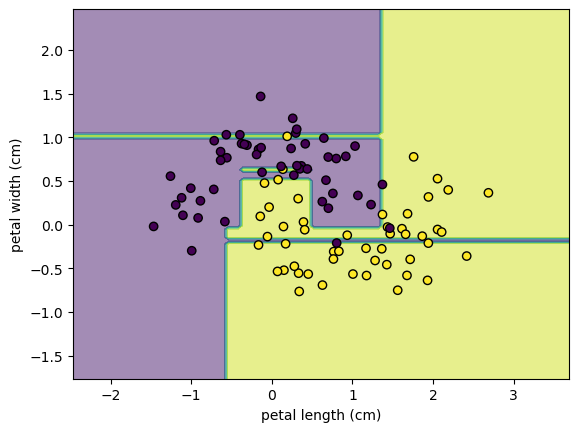

In [9]:
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

Show the results when the model is instead constrained to contain a minimum number of points in each leaf

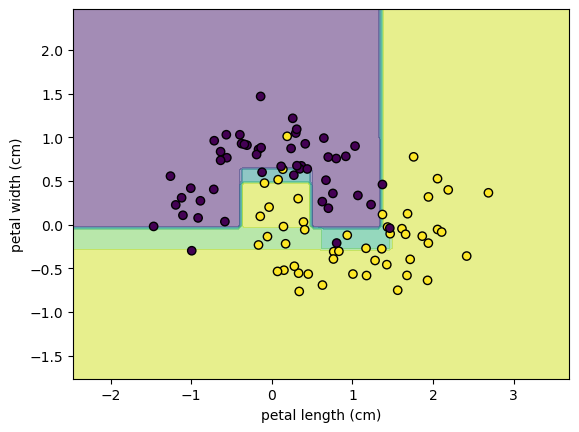

In [10]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_X, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

## Noisy quadratic dataset example

Generate a quadratic function with some noise

In [11]:
n = 100
np.random.seed(42)
quad_X = np.random.uniform(size=(n,1))
quad_y = 4*(quad_X[:,0] - 0.5)**2 + 0.1*np.random.normal(size=n)

Fit a regression model to the quadratic

In [12]:
m = DecisionTreeRegressor(random_state=42)
m.fit(quad_X, quad_y);

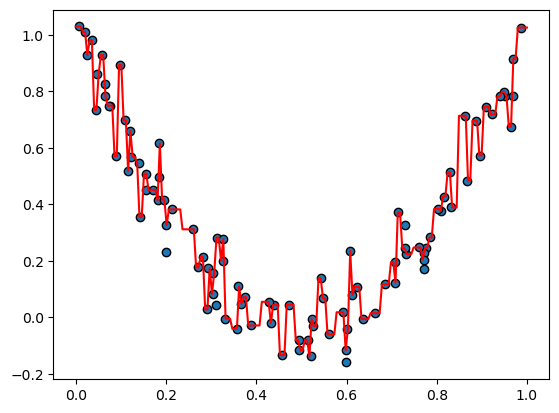

In [13]:
xvals = np.linspace(0,1,200)
plt.plot(xvals, m.predict(xvals[:,np.newaxis]), 'r')
plt.scatter(quad_X, quad_y, edgecolor="k")

As before, the degree of overfitting can be reduced by setting a minimum number of samples per leaf

In [14]:
m = DecisionTreeRegressor(min_samples_leaf=6, random_state=42)
m.fit(quad_X, quad_y);

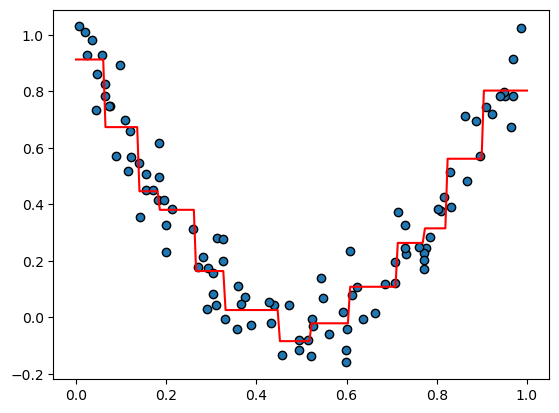

In [15]:
xvals = np.linspace(0,1,200)
plt.plot(xvals, m.predict(xvals[:,np.newaxis]), 'r')
plt.scatter(quad_X, quad_y, edgecolor="k")

## Instability

Rotation of the features can significantly change the prediction model

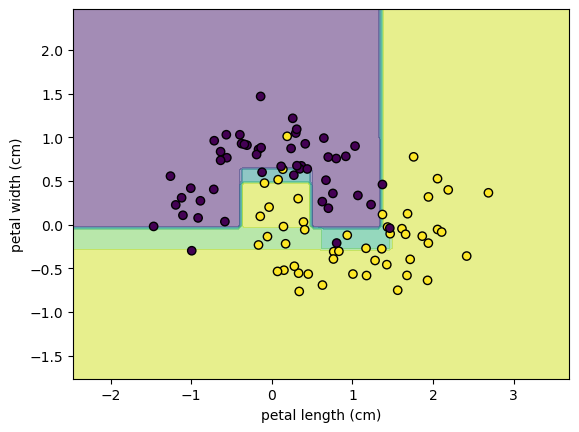

In [16]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_X, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

In [17]:
theta = np.pi / 4
moons_rotX =  moons_X @ np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

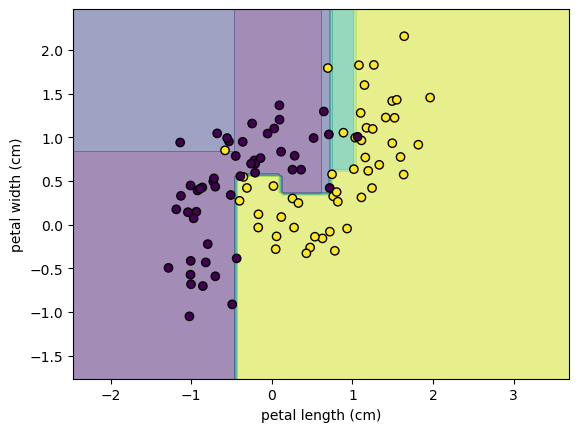

In [18]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_rotX, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_rotX[:, 0], moons_rotX[:, 1], c=moons_y, edgecolor="k")

Even different initial random states (or small changes in the training data) can also lead to very different results

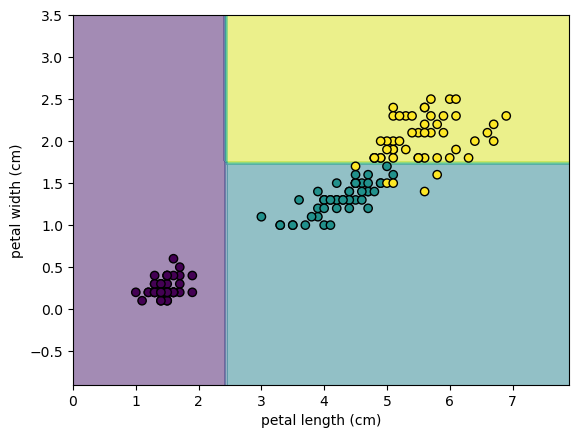

In [19]:
m = DecisionTreeClassifier(max_depth=2, random_state=42)
m.fit(iris_X, iris_y);
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")

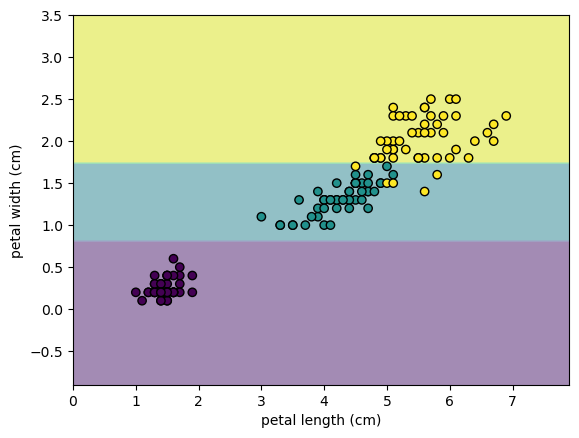

In [20]:
m = DecisionTreeClassifier(max_depth=2, random_state=1811)
m.fit(iris_X, iris_y);
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")

## Exercises

### 6.1

In the best case one might have a binary decision task where the two classes are trivially seperable in feature space, and the decision tree depth will be 1. In the worst case each leaf will contain a single datapoint, and thus the tree will have $N$ leaves. For a regression task this could in theory lead to a total tree depth of $N-1$ in the worst case for the CART algorithm. In the random case one might expect the depth to be the same as a random binary tree with $N$ leaves (or an average of $3N + 1$ nodes) - i.e. a depth of $\beta^{-1} \log(3N + 1)$, where $\beta$ is the unique solution to $1 = 2 \beta e^{1-\beta}$ with $0 < \beta < 1$. Surprisingly, measuring the tree depth for random samples seems to show much deeper trees than one might expect from a random binary tree. This suggests a more careful analysis is needed for the random case (but this probably goes beyond what the question is asking).

Best-case example:

In [21]:
N = 1000000; p = 0.5; b_y = np.array([[10]])
np.random.seed(42)
y = np.random.uniform(size=N) > p
X = y.reshape((N,1))*b_y + np.random.normal(size=(N,1))
m = DecisionTreeClassifier(random_state=42).fit(X, y)
m.get_depth()

1

Worst-case example (shown with $N$=1000 for performance reasons):

In [22]:
N = 1000
X = np.arange(N).reshape(N,1)
y = (-1)**X[:,0]
m = DecisionTreeRegressor(random_state=42).fit(X, y)
m.get_depth()

999

Random-case example:

Difference between actual and predicted mean: 15.1 (95% CI, 12.5-17.7)


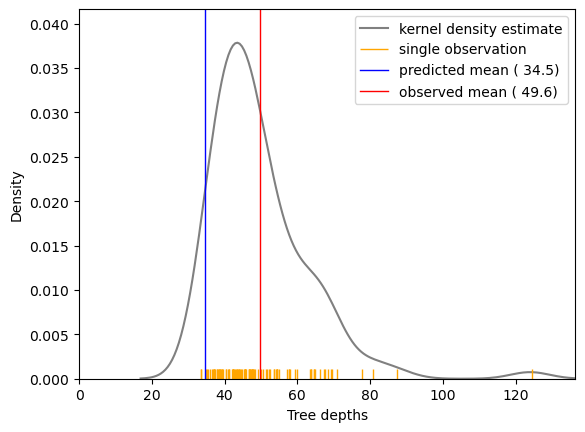

In [23]:
N = 1000; p = 0.5; b_y = np.array([[0]])
M = 100
depths = np.empty(M)
for i in range(M):
    np.random.seed(i + 0xABADCAFE)
    y = np.random.uniform(size=N) > p
    X = y.reshape((N,1))*b_y + np.random.normal(size=(N,1))
    m = DecisionTreeClassifier(random_state=i).fit(X, y)
    depths[i] = m.get_depth()

sns.kdeplot(depths, color='gray', label="kernel density estimate")
sns.rugplot(depths + np.random.uniform(size=depths.size) - 0.5, label='single observation', color='orange')

beta = sp.optimize.root_scalar(lambda beta: 2*beta*np.exp(1 - beta) - 1, bracket=(0,1)).root
predicted_mean = 1/beta*np.log(3*N - 1)

plt.axvline(x=predicted_mean, color='b', linewidth=1,
    label=f'predicted mean ({predicted_mean : .1f})')
plt.axvline(x=np.mean(depths), color='r', linewidth=1, 
    label=f'observed mean ({np.mean(depths) : .1f})')

plt.legend()
plt.xlabel("Tree depths")
plt.xlim((0,max(depths)*1.1));

difference = np.mean(depths) - predicted_mean
stderr = np.std(depths, ddof=1)/np.sqrt(len(depths))
print("Difference between actual and predicted mean: " +
      f"{difference:.1f} " +
      f"(95% CI, {difference - 1.96*stderr:0.1f}-{difference + 1.96*stderr:0.1f})"
     )

### 6.2

In the CART algorithm a node can have a Gini coefficient higher or lower than its parent, but generally the Gini coefficient will be lower.

A node will only be split if it reduces the cost function
$$J_{i} = \frac{m_\textrm{left}}{m}G_\textrm{left} + \frac{m_\textrm{right}}{m}G_\textrm{right}$$
compared to the cost of not splitting,
$$J_{i-1} = G_\textrm{parent}.$$
We thus have
$$J_{i-1} < J_{i-1}$$
and thus
$$
G_\textrm{parent} < \frac{m_\textrm{left}}{m}G_\textrm{left} + \frac{m_\textrm{right}}{m}G_\textrm{right}.
$$
We can trivially see that this can be satisfied by a split that increases the Gini impurity of a single node. For example, below we can see that if we have a parent node with 1 element of class A and 3 elements of class B, it will have a Gini coefficient (and cost of not splitting) of $3/8 = 0.375$. If we can find a split which divides this into a left node with 1 element of class A and 1 of class B and a right node with two elements of class B, the cost function will be $1/4 = 0.25$ (thus favoring the split) but the Gini coefficient for the left node will be $1/2 = 0.5$ (thus higher than the parent) and the Gini coefficient of the right node will be $0$ (thus lower than the parent node). Thus we can see that both higher and lower Gini coefficients are possible with this single example.

In [24]:
def G(n,m):
    return 1 - (n/m)**2 - ((m - n)/m)**2

def J(n_left, m_left, n_right, m_right):
    return m_left/(m_left + m_right) * G(n_left, m_left) + m_right/(m_left + m_right) * G(n_right, m_right)

In [25]:
G(3, 4)

0.375

In [26]:
J(1,2,2,2)

0.25

In [27]:
G(1, 2)

0.5

In [28]:
G(2, 2)

0.0

Typicaly, we expect the data to have an underlying spacial structure that allows for a split to decrease the Gini coefficient in both parts of the split in the majority of cases; if not we are likely overfitting the data. More generally, if we assume that all possible classes and orders are possible, we find that, at least up to groups of size 16, in the majority of cases both children of the best split will have a lower Gini coefficient than the parent:

In [29]:
def get_bits(i, num_bits):
    return [int(bool(i & (1 << j))) for j in range(num_bits)]

In [30]:
def CART_best_split(data):
    sum_left = 0
    sum_right = sum(data)
    N = len(data)

    J_best = G(sum_right, N) # no split
    num_left_best = 0
    for num_left in range(1,N):
        sum_left += data[num_left-1]
        sum_right -= data[num_left-1]
        J_new = J(sum_left, num_left, sum_right, (N - num_left))
        if J_best > J_new:
            J_best = J_new
            num_left_best = num_left
    return num_left_best

In [31]:
def child_has_increased_Gini(data):
    num_left = CART_best_split(data)
    if num_left == 0:
        return False
    sum_left = sum(data[:num_left])
    sum_right = sum(data[num_left:])
    G_parent = G(sum_left+sum_right, len(data))
    G_left = G(sum_left, num_left)
    G_right = G(sum_right, len(data) - num_left)
    return G_parent < max(G_left, G_right)

In [32]:
def fraction_of_all_possible_splits_with_increased_gini(group_size):
    count_increased_gini = 0
    for i in range(2**group_size):
        data = get_bits(i, group_size)
        if child_has_increased_Gini(data):
            count_increased_gini += 1
    return count_increased_gini/2**group_size

print("Fraction of all possible groups of size N where one"
      "\nof the children has a higher Gini than the parent: ")
print("\n N\tFraction")
print("-----------------")
for n in range(2,17):
    print(f" {n}\t{fraction_of_all_possible_splits_with_increased_gini(n):.3f}")

Fraction of all possible groups of size N where one
of the children has a higher Gini than the parent: 

 N	Fraction
-----------------
 2	0.000
 3	0.250
 4	0.250
 5	0.250
 6	0.312
 7	0.281
 8	0.320
 9	0.293
 10	0.316
 11	0.297
 12	0.341
 13	0.286
 14	0.338
 15	0.283
 16	0.329


### 6.3

Decreasing maximum depth (which is a form of regularization) would be reasonable to try to reduce overfitting.

### 6.4

Scaling the data will not help with underfitting for a (CART-trained) decision tree. The CART algorithm only assumes the input features are ordinal (i.e. a total order is defined) but does not use any assumptions about the data being scalar (i.e. has a well defined distance function). As scaling the data only affects the distance metric (and not the ordering), the results of the CART algorithm will not change when the input features are scaled.

### 6.5

One could cautiously guess that the algorithm will scale as $O(n \lg n)$, as for a balanced binary tree the depth of the tree will scale as $O(\lg n)$ and the number of trial splits per layer to consider is roughly proportional to the number of elements (times the number of features). This assumption would yield about a 10-fold increase in run time for the 10-fold increase in sample size in this problem.

As seen in exercise 6.1, however, on closer examination one quickly encounters challenges. The depth of the tree can grow liniearly with the sample size in the worst case, leading to a $O(n^2)$ runtime. We thus would need to be given a set of assumptions about the distribution of the data in this question to answer the question with any degree of rigor.

### 6.6

No - the `presort` parameter has been removed, so the time spent trying to use that parameter will be added to the total time spent training the model without that parameter.